**Hoomework 1 Starter**

1. IMDB Scraping

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

Write a function that takes a BeautifulSoup table of movies and parses out the movie attributes.

In [ ]:
def getMovieResultsFromPage(table, movies):
  for rowRaw in table.find_all('div', class_='lister-item mode-detail'):
    row = rowRaw.find('div', class_='lister-item-content')
    row2 = row.find_all('p', class_ = 'text-muted text-small')
    head = rowRaw.find('h3', class_='lister-item-header')
    name = head.find('a').text
    year = head.find('span', class_='lister-item-year text-muted unbold').text
    year = year[1:-1]
    if len(year)>4:
      year=year[-4:]
    rate1 = row.find('div', class_='ipl-rating-widget')
    rate2 = rate1.find('div', class_='ipl-rating-star small')
    rating = rate2.find('span',class_='ipl-rating-star__rating').text
    run1 = row.find('p', class_ = 'text-muted text-small')
    run = row2[0].find('span',class_='runtime').text
    votes1 = row2[2].find_all('span')
    votes = votes1[1].get('data-value')
    genre = row2[0].find('span',class_='genre').text
    genre = genre[1:].split()
    if len(genre)>1:
      genre = genre[0][:-1]
    else:
      genre = genre[0]
    dir = row2[1].find('a').text
    movies['Name'].append(name)
    movies['Year'].append(year)
    movies['Rating'].append(rating)
    movies['RunTime'].append(run)
    movies['Votes'].append(votes)
    movies['Genre'].append(genre)
    movies['Director'].append(dir)

You'll need somewhere to store the movies

In [ ]:
movies = {'Name':[],
          'Rating':[],
          'Year':[],
          'RunTime':[],
          'Votes':[],
          'Genre':[],
          'Director':[]}

Next, process the html pages using BeautifulSoup, and create a table with all movies.

In [ ]:
headers = {"Accept-Language": "en-US,en;q=0.5"}
for i in range(1,4):
  source = requests.get('https://www.imdb.com/list/ls068082370/?sort=list_order,asc&st_dt=&mode=detail&page='+str(i), headers= headers).text
  soup = BeautifulSoup(source, 'lxml')
  table = soup.find('div', class_='lister-list')
  getMovieResultsFromPage(table, movies)

In [ ]:
df = pd.DataFrame(movies, columns = ['Name', 'Rating', 'Year', 'RunTime', 'Votes', 'Genre', 'Director'])
convert = {'Name':str, 'Rating':float, 'Year':int, 'RunTime':str, 'Votes':int, 'Genre':str, 'Director':str}
df = df.astype(convert)

In [ ]:
print("Movie with the most number of votes: "+df[df.Votes==df.Votes.max()].Name.values[0])
print("Movie with the least number of votes: "+df[df.Votes==df.Votes.min()].Name.values[0])

Movie with the most number of votes: The Shawshank Redemption
Movie with the least number of votes: Zulu


Genre with the most number of movies: Drama


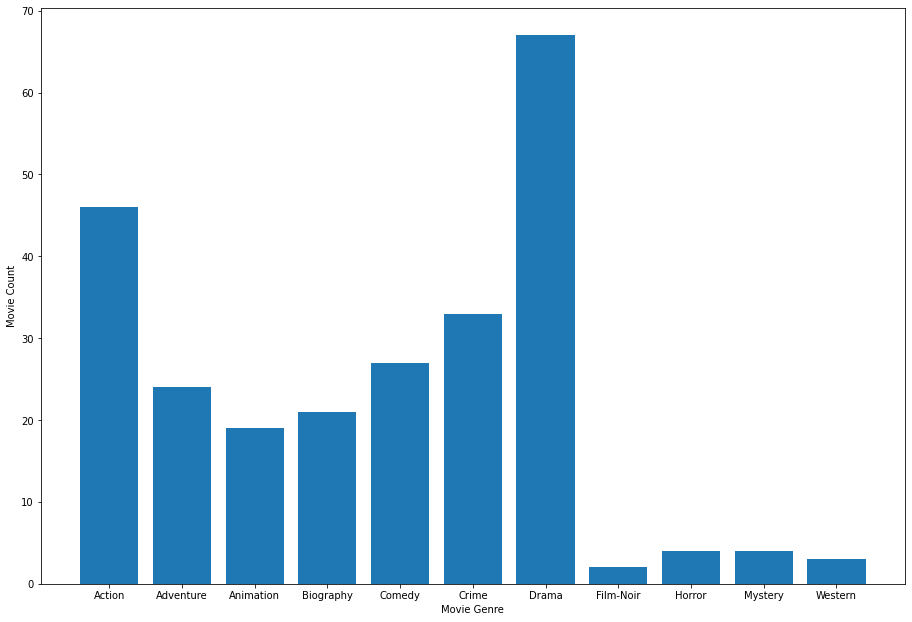

In [ ]:
df2 = list(df.groupby(['Genre']).size())
df3 = sorted(df.Genre.unique())
figure = plt.figure()
axes = figure.add_axes([0,0,2,2])
axes.bar(df3,df2)
plt.xlabel('Movie Genre')
plt.ylabel('Movie Count')
m = max(df2)
ind = df2.index(m)
print("Genre with the most number of movies: " + str(df3[ind]))

In [ ]:
df4 = list(df.groupby('Director').size())
df5 = sorted(df.Director.unique())
df6 = sorted(zip(df4,df5))[::-1]
ans = [x for _,x in df6[:5]]
print("Top 5 directors with the most number of movies: ")
print(ans)

Top 5 directors with the most number of movies: 
['Steven Spielberg', 'Stanley Kubrick', 'Martin Scorsese', 'Christopher Nolan', 'Alfred Hitchcock']


2. Severe Storms with Google BigQuery
 

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


2. Declare the Cloud project ID which will be used throughout this notebook. You need to login your BigQuery to find out your own project id and paste it below.

In [ ]:
# For example mine is test-project-ecs189l, so I will run project_id = 'test-project-ecs189l'
# project_id = 'Paste Your Project ID here to Replace This String'
project_id = 'cogent-tract-278801'

Read the database into a data frame

In [ ]:
df = pd.io.gbq.read_gbq('''SELECT
  LOWER(event_type) as event_type,
  COUNT(event_id) as count_storms
FROM
  `bigquery-public-data.noaa_historic_severe_storms.storms_*`
WHERE _TABLE_SUFFIX BETWEEN '1950' AND '2000' GROUP BY event_type ORDER BY count_storms desc''', project_id)

In [ ]:
df2 = df[0:40].event_type
print(df2)
print("The Top Event Type is "+str(df2[0]))

0           thunderstorm wind
1                        hail
2                     tornado
3                  heavy snow
4                 flash flood
5                winter storm
6                   high wind
7                       flood
8                     drought
9             cold/wind chill
10                       heat
11                  lightning
12             winter weather
13                  ice storm
14                 heavy rain
15                   blizzard
16                strong wind
17                  dense fog
18               funnel cloud
19    extreme cold/wind chill
20                  high surf
21                 waterspout
22                   wildfire
23        hurricane (typhoon)
24               frost/freeze
25              coastal flood
26             excessive heat
27             tropical storm
28                rip current
29                      sleet
30           lake-effect snow
31           storm surge/tide
32                  avalanche
33        

In [ ]:
df3 = pd.io.gbq.read_gbq('''SELECT
  event_begin_time as date,
  LOWER(event_type) as event_type
FROM
  `bigquery-public-data.noaa_historic_severe_storms.storms_*`
WHERE _TABLE_SUFFIX BETWEEN '1950' AND '2000' AND event_type="tornado" ORDER BY date''', project_id)

df3['Year'] = pd.DatetimeIndex(df3['date']).year


Text(0, 0.5, 'Number of Tornados')

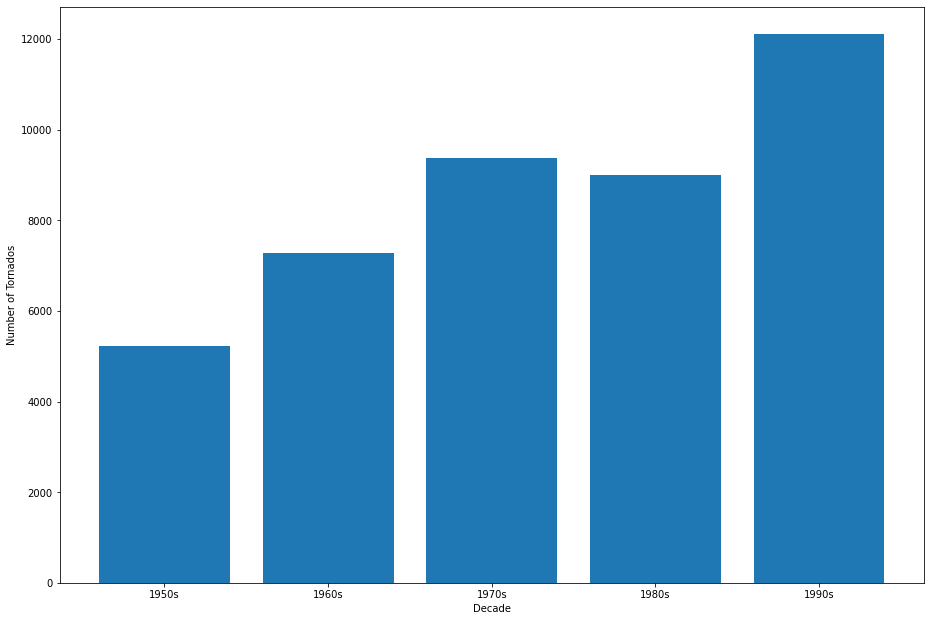

In [ ]:
df4 = list(df3.groupby(['Year']).size())
tot = 0
arr=[]
for i in range(len(df4)):
  tot = tot+df4[i]
  if (i+1)%10==0:
    arr.append(tot)
    tot=0
figure = plt.figure()
axes = figure.add_axes([0,0,2,2])
axes.bar(['1950s','1960s','1970s','1980s','1990s'],arr)
plt.xlabel('Decade')
plt.ylabel('Number of Tornados')

3. 2020 Election Polls

You are on your own here. Here are some suggestions:

* Identify and download the file you need from the web site
* Store the file in a data frame
* Answer the two questions

In [ ]:
polls = pd.read_csv('/content/president_primary_polls.csv',low_memory=False)
number = polls.candidate_name.unique()
number = len(number)
print("Number of unique presidential candidates: "+str(number))

In [ ]:
print("Average sample size in national polls in 2020: "+str(polls.mean(axis=0,skipna=True).sample_size))